### imports and setup

In [111]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [113]:
from utils import *
from exploration import *

### load data

In [155]:
monthly_data, yearly_data = load_dataset()

### explore data

#### examine monthly data

In [10]:
monthly_data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,average_price_d1,year,month,seconds
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,0.0,1995,1,0.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,626.0,1995,2,2678400.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,183.0,1995,3,5097600.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1865.0,1995,4,7776000.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,-92.0,1995,5,10368000.0
...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,-342.0,2019,9,778377600.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,1307.0,2019,10,780969600.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,-2139.0,2019,11,783648000.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2402.0,2019,12,786240000.0


In [11]:
monthly_data[monthly_data.borough_flag == 0].area.unique()

array(['east midlands', 'east of england', 'england', 'inner london',
       'london', 'north east', 'north west', 'outer london', 'south east',
       'south west', 'west midlands', 'yorkshire and the humber'],
      dtype=object)

In [12]:
monthly_data[monthly_data.borough_flag == 1].area.unique()

array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
       'camden', 'city of london', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster'], dtype=object)

In [13]:
monthly_data.date.unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [14]:
monthly_data.date.unique().shape

(301,)

In [15]:
301 // 12


25

In [16]:
301 % 12

1

plot timeseries for overall price trends

In [17]:
monthly_data.date.unique()[0]

numpy.datetime64('1995-01-01T00:00:00.000000000')

In [18]:
[
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
]


[3382098,
 3366205,
 3361630,
 3368298,
 3400421,
 3437147,
 3470732,
 3469857,
 3447667,
 3426080,
 3415332,
 3429860,
 3420591,
 3577418,
 3446426,
 3498854,
 3512972,
 3550363,
 3571060,
 3609949,
 3624792,
 3620842,
 3646187,
 3670945,
 3730982,
 3773280,
 3817642,
 3866532,
 3942935,
 4010654,
 4090074,
 4134502,
 4199907,
 4227797,
 4283050,
 4316554,
 4364362,
 4398492,
 4441249,
 4674069,
 4547458,
 4591716,
 4641572,
 4687290,
 4705909,
 4703935,
 4691722,
 4699140,
 4724415,
 4761864,
 4816434,
 4889924,
 4965671,
 5049843,
 5138162,
 5254401,
 5398103,
 5473801,
 5579763,
 5645952,
 5744188,
 5831508,
 5926284,
 6099704,
 6201547,
 6340131,
 6439786,
 6535934,
 6580786,
 6564940,
 6655749,
 6668342,
 6702190,
 6630922,
 6683728,
 6767752,
 6887755,
 7013861,
 7131861,
 7253358,
 7303321,
 7372044,
 7469350,
 7527330,
 7549013,
 7532927,
 7588785,
 7730867,
 7913706,
 8137726,
 8336237,
 8507855,
 8637641,
 8719880,
 8841148,
 8887210,
 8987298,
 8999408,
 9048596,
 9080206,


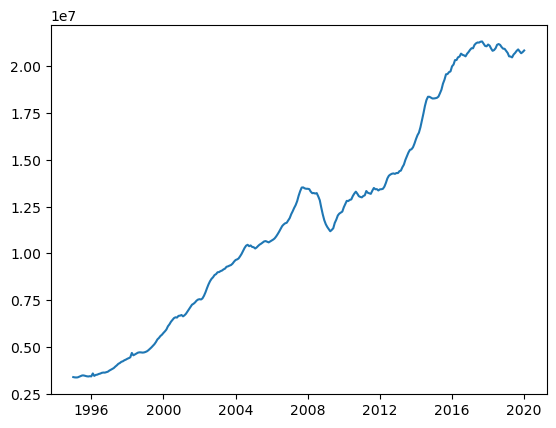

In [19]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
])


In [22]:
plot_var(monthly_data, "average_price")

/Users/h.lu/Documents/_academic/_MATH462/math462_project/scripts/exploration.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


KeyboardInterrupt: 

visualize aggregate number of crimes committed by month

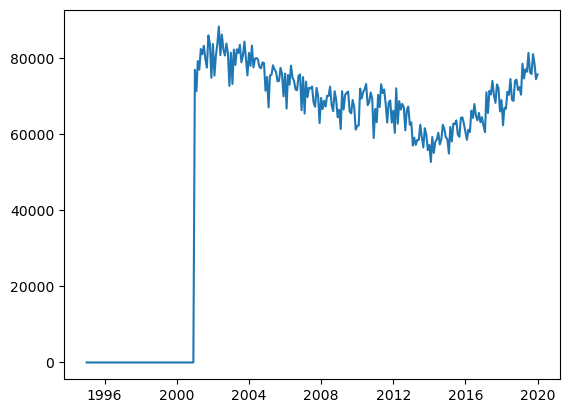

In [ ]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].no_of_crimes.sum()
    for i in range(len(monthly_data.date.unique()))
])


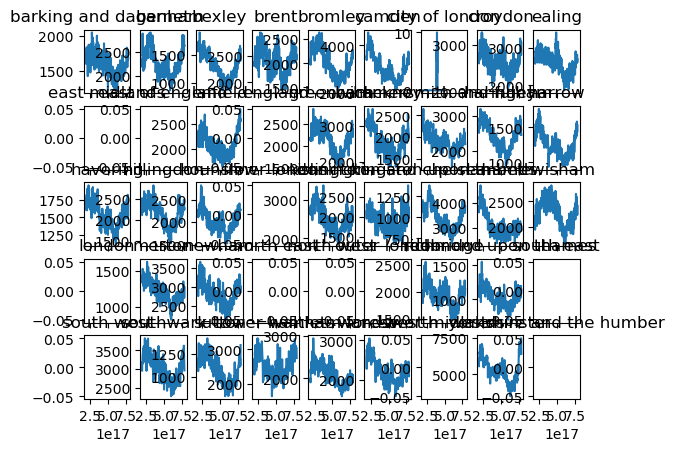

In [ ]:
plot_var(monthly_data, "no_of_crimes")

#### examine yearly data

In [23]:
yearly_data

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month,seconds
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1,1999,12,155088000.0
52,E09000002,barking and dagenham,2000-12-01,22618.0,NaN,24696,4,163893.0,57000.0,NaN,NaN,1,2000,12,186710400.0
103,E09000002,barking and dagenham,2001-12-01,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1,2001,12,218246400.0
154,E09000002,barking and dagenham,2002-12-01,24813.0,NaN,26653,3,166357.0,52000.0,3780.0,68526.0,1,2002,12,249782400.0
205,E09000002,barking and dagenham,2003-12-01,25358.0,NaN,27792,5,166210.0,55000.0,3780.0,68837.0,1,2003,12,281318400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,E12000003,yorkshire and the humber,2015-12-01,25194.0,7.65,29371,44,5390576.0,2694000.0,NaN,NaN,0,2015,12,660009600.0
902,E12000003,yorkshire and the humber,2016-12-01,25946.0,7.69,29811,43,5425741.0,2735000.0,NaN,NaN,0,2016,12,691632000.0
953,E12000003,yorkshire and the humber,2017-12-01,26309.0,7.66,30484,42,NaN,2759000.0,NaN,NaN,0,2017,12,723168000.0
1004,E12000003,yorkshire and the humber,2018-12-01,26892.0,7.70,31719,43,NaN,2773000.0,NaN,NaN,0,2018,12,754704000.0


In [24]:
yearly_data.loc[(yearly_data.year == 2000) & (
    yearly_data.area == 'barking and dagenham')]["median_salary"].values


array([22618.])

In [25]:
monthly_data.loc[(monthly_data.year == 1995) &
                 (monthly_data.area == 'barking and dagenham'),
                 'new_col_delete'] = 10
monthly_data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,average_price_d1,year,month,seconds,new_col_delete
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,0.0,1995,1,0.0,10.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,626.0,1995,2,2678400.0,10.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,183.0,1995,3,5097600.0,10.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1865.0,1995,4,7776000.0,10.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,-92.0,1995,5,10368000.0,10.0


In [85]:
np.datetime64('1999-12-01')

numpy.datetime64('1999-12-01')

In [88]:
yearly_data.loc[yearly_data.area == 'barking and dagenham',
                ['date', 'area', 'median_salary']].groupby('area').resample(
                    'M', on='date',
                    origin='start').mean(numeric_only=True)  #.interpolate()


median_salary
area                 date                     
barking and dagenham 1999-12-31        21480.0
                     2000-01-31            NaN
                     2000-02-29            NaN
                     2000-03-31            NaN
                     2000-04-30            NaN
...                                        ...
                     2019-08-31            NaN
                     2019-09-30            NaN
                     2019-10-31            NaN
                     2019-11-30            NaN
                     2019-12-31        28738.0

[241 rows x 1 columns]

In [95]:
yearly_data.loc[yearly_data.area == 'barking and dagenham'].shape


(21, 15)

In [51]:
test_df = yearly_data[['date', 'area', 'mean_salary']].groupby('area').resample(
    'M', on='date').mean(numeric_only=True)

# test_df['mean_salary'] = test_df['mean_salary'].interpolate()
# for col in test_df.columns:
#     if col in ['year',
#        'month', 'seconds']:
#         pass
#     else:
#         test_df[col] = test_df[col].interpolate()
test_df
# .month.interpolate()

Empty DataFrame
Columns: []
Index: [(barking and dagenham, 1999-12-31 00:00:00), (barking and dagenham, 2000-01-31 00:00:00), (barking and dagenham, 2000-02-29 00:00:00), (barking and dagenham, 2000-03-31 00:00:00), (barking and dagenham, 2000-04-30 00:00:00)]

### integrate yearly data into monthly dataset

In [169]:
yearly_resampled = clean_load_dataset(
    '../dataset/housing_in_london_yearly_variables_resampled.csv')

In [144]:
yearly_resampled.loc[(yearly_resampled.area == a)
                     & (yearly_resampled.year == 2019)]


,Unnamed: 0,area,date,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month
229,229,barking and dagenham,2019-01-31,29890.25,7.519427,219803.4615,68880.0,3912.297297,76425.48649,1,2019,1
230,230,barking and dagenham,2019-02-28,29785.50,7.518854,227608.9231,71760.0,4044.594595,77927.97297,1,2019,2
231,231,barking and dagenham,2019-03-31,29680.75,7.518280,235414.3846,74640.0,4176.891892,79430.45946,1,2019,3
232,232,barking and dagenham,2019-04-30,29576.00,7.517707,243219.8462,77520.0,4309.189189,80932.94595,1,2019,4
233,233,barking and dagenham,2019-05-31,29471.25,7.517134,251025.3077,80400.0,4441.486486,82435.43243,1,2019,5
234,234,barking and dagenham,2019-06-30,29366.50,7.516561,258830.7692,83280.0,4573.783784,83937.91892,1,2019,6
235,235,barking and dagenham,2019-07-31,29261.75,7.515987,266636.2308,86160.0,4706.081081,85440.40541,1,2019,7
236,236,barking and dagenham,2019-08-31,29157.00,7.515414,274441.6923,89040.0,4838.378378,86942.89189,1,2019,8
237,237,barking and dagenham,2019-09-30,29052.25,7.514841,282247.1538,91920.0,4970.675676,88445.37838,1,2019,9
238,238,barking and dagenham,2019-10-31,28947.50,7.514268,290052.6154,94800.0,5102.972973,89947.86486,1,2019,10


In [170]:
a = 'east'
col = 'median_salary'
min_year = 1999
max_year = 2019

# yearly_resampled.loc[yearly_resampled.area == a]
monthly_data.loc[(monthly_data.area == a) & (monthly_data.year > min_year) &
                 (monthly_data.year <= max_year), col]
# yearly_resampled[(yearly_resampled.area == a)
#                  & (yearly_resampled.year > min_year) &
#                  (yearly_resampled.year <= max_year)]


Series([], Name: median_salary, dtype: float64)

In [177]:
set(monthly_data.area.unique()) - set(yearly_resampled.area.unique())  #.shape


{'east of england'}

In [178]:
set(yearly_data.area.unique()) - set(monthly_data.area.unique())  #.shape


{'east',
 'england and wales',
 'great britain',
 'northern ireland',
 'scotland',
 'united kingdom',
 'wales'}

In [166]:
yearly_resampled.columns

Index(['Unnamed: 0', 'area', 'date', 'median_salary', 'life_satisfaction',
       'population_size', 'number_of_jobs', 'area_size', 'no_of_houses',
       'borough_flag', 'year', 'month'],
      dtype='object')

In [194]:
def interpolate_yearly(monthly_data, yearly_resampled, col, interpolate=True):
    assert col in yearly_resampled.columns
    # by month and area
    # yearly data covers range 1999 to 2019 (all on dec 1)
    # for the years in the monthly data that aren't covered in the yearly data, we just copy the nearest yearly data
    min_year = 1999
    max_year = 2019

    for a in yearly_resampled.area.unique():
        if a not in monthly_data.area.unique():
            continue
        # copy interpolated data between min and max year
        # TODO: fix this line 
        monthly_data.loc[
            (monthly_data.area == a) & (monthly_data.year > min_year) &
            (monthly_data.year <= max_year),
            col] = yearly_resampled[(yearly_resampled.area == a)
                                    & (yearly_resampled.year > min_year) &
                                    (yearly_resampled.year <= max_year), col].values[0]
        # copy constant-filled data before min year
        monthly_data.loc[(monthly_data.area == a)
                         & (monthly_data.year <= min_year),
                         col] = yearly_resampled.loc[
                             (yearly_resampled.area == a)
                             & (yearly_resampled.year == min_year),
                             col].values[0]
        # copy constant-filled data after max year
        monthly_data.loc[(monthly_data.area == a)
                         & (monthly_data.year > max_year),
                         col] = yearly_resampled.loc[
                             (yearly_resampled.area == a)
                             & (yearly_resampled.year == max_year) &
                             (yearly_resampled.month == 12), col].values[0]

    return monthly_data

In [195]:
df = interpolate_yearly(monthly_data, yearly_resampled,
                   'median_salary')
# a = 'yorkshire and the humber'
# a = 'barking and dagenham'
# df.loc[(df.area == a) & (df.year > 1999)]
# df.loc[(df.area == 'yorkshire and the humber')]
df


InvalidIndexError: (0        False
1         True
2         True
3         True
4         True
         ...  
12286    False
12287    False
12288    False
12289    False
12290    False
Length: 12291, dtype: bool, 'median_salary')

In [ ]:
# def interpolate_yearly(monthly_data, yearly_data, col, interpolate=True):
#     # by month and area
#     # yearly data covers range 1999 to 2019 (all on dec 1)
#     # for the years in the monthly data that aren't covered in the yearly data, we just copy the nearest yearly data
#     min_year = 1999
#     max_year = 2020
#     if interpolate:
#         # do linear interpolation between the nearest available data points
#         for year in range(min_year, max_year):
#             for a in yearly_data.area.unique():
#                 yearly_data[col]
#                 pass
#     else:
#         # copy
#         for a in yearly_data.area.unique():
#             for year in range(min_year, max_year):
#                 monthly_data.loc[(monthly_data.year == year) &
#                                  (monthly_data.area == a),
#                                  col] = yearly_data.loc[
#                                      (yearly_data.year == year)
#                                      & (yearly_data.area == a)][col].values[0]

#         # for anything earlier than the min_year in the yearly data, copy
#         # the earliest available data
#         monthly_data.loc[
#             (monthly_data.year < min_year) & (monthly_data.area == a),
#             col] = yearly_data.loc[(yearly_data.year == min_year)
#                                    & (yearly_data.area == a)][col].values[0]
#         # for anything later than the max_year in the yearly data, copy the
#         # latest available data
#         monthly_data.loc[
#             (monthly_data.year > max_year) & (monthly_data.area == a),
#             col] = yearly_data.loc[(yearly_data.year == max_year)
#                                    & (yearly_data.area == a)][col].values[0]


In [ ]:
monthly_data.year.min()

1995